In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import scipy.io

from sklearn.decomposition import PCA

In [2]:
d1_real = scipy.io.loadmat('mass58_length1_angle15_sample1.mat')
d2_real = scipy.io.loadmat('mass58_length2_angle15_sample1.mat')
d3_real = scipy.io.loadmat('mass58_length3_angle15_sample1.mat')
d1_virt = scipy.io.loadmat('Sample1.mat')
d2_virt = scipy.io.loadmat('Sample2.mat')
d3_virt = scipy.io.loadmat('Sample3.mat')

In [3]:
# DATASET 1 Real
t1_real = d1_real['t_new']
theta1_real = d1_real['theta_new']
# DATASET 2 Real
t2_real = d2_real['t_new']
theta2_real = d2_real['theta_new']
# DATASET 3 Real
t3_real = d3_real['t_new']
theta3_real = d3_real['theta_new']
# DATASET 1 Virtual
t1_virt = d1_virt['T']
theta1_virt = d1_virt['THETA']
# DATASET 2 Virtual
t2_virt = d2_virt['T']
theta2_virt = d2_virt['THETA']
# DATASET 3 Virtual
t3_virt = d3_virt['T']
theta3_virt = d3_virt['THETA']

In [4]:
X1_real = np.concatenate((t1_real,theta1_real), axis=1)
X2_real = np.concatenate((t2_real,theta2_real), axis=1)
X3_real = np.concatenate((t3_real,theta3_real), axis=1)
X1_virt = np.concatenate((t1_virt,theta1_virt), axis=1)
X2_virt = np.concatenate((t2_virt,theta2_virt), axis=1)
X3_virt = np.concatenate((t3_virt,theta3_virt), axis=1)

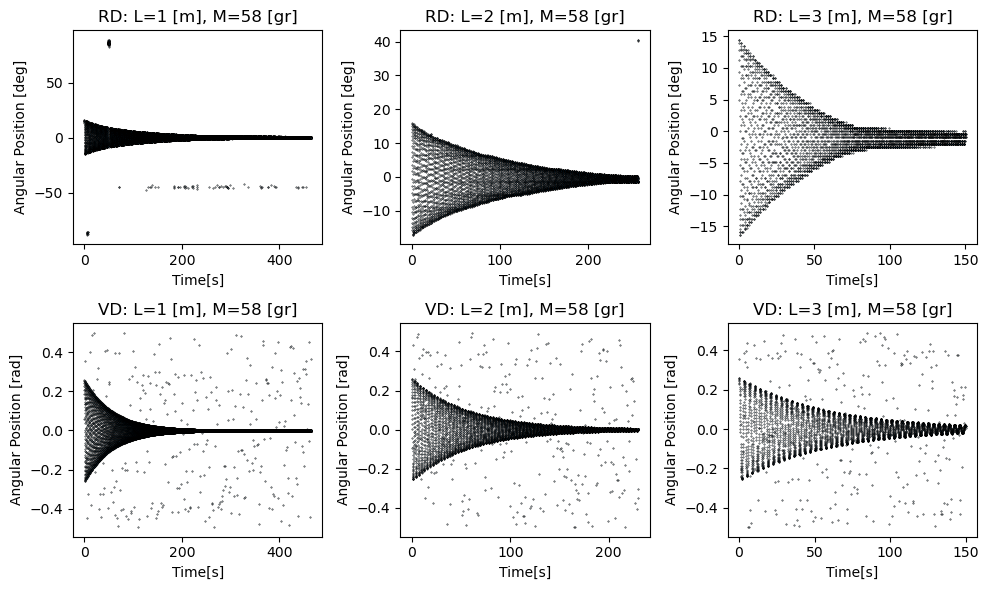

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
axes[0, 0].scatter(t1_real, theta1_real, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[0, 0].set_title('RD: L=1 [m], M=58 [gr]')
axes[0, 0].set_xlabel('Time[s]')
axes[0, 0].set_ylabel('Angular Position [deg]')
axes[0, 1].scatter(t2_real, theta2_real, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[0, 1].set_title('RD: L=2 [m], M=58 [gr]')
axes[0, 1].set_xlabel('Time[s]')
axes[0, 1].set_ylabel('Angular Position [deg]')
axes[0, 2].scatter(t3_real, theta3_real, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[0, 2].set_title('RD: L=3 [m], M=58 [gr]')
axes[0, 2].set_xlabel('Time[s]')
axes[0, 2].set_ylabel('Angular Position [deg]')

# Second Row
axes[1, 0].scatter(t1_virt, theta1_virt, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[1, 0].set_title('VD: L=1 [m], M=58 [gr]')
axes[1, 0].set_xlabel('Time[s]')
axes[1, 0].set_ylabel('Angular Position [rad]')
axes[1, 1].scatter(t2_virt, theta2_virt, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[1, 1].set_title('VD: L=2 [m], M=58 [gr]')
axes[1, 1].set_xlabel('Time[s]')
axes[1, 1].set_ylabel('Angular Position [rad]')
axes[1, 2].scatter(t3_virt, theta3_virt, s=0.5, marker='.', edgecolors='black', alpha=1)
axes[1, 2].set_title('VD: L=3 [m], M=58 [gr]')
axes[1, 2].set_xlabel('Time[s]')
axes[1, 2].set_ylabel('Angular Position [rad]')


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('The Datasets.png', dpi=300)
# Show the plot
plt.show()

#### Center and scale the dataset

In [6]:
# Centers
C1r = np.mean(X1_real, axis=0)
C2r = np.mean(X2_real, axis=0)
C3r = np.mean(X3_real, axis=0)
C1v = np.mean(X1_virt, axis=0)
C2v = np.mean(X2_virt, axis=0)
C3v = np.mean(X3_virt, axis=0)
#Scales
S1r = np.std(X1_real, axis=0)
S2r = np.std(X2_real, axis=0)
S3r = np.std(X3_real, axis=0)
S1v = np.std(X1_virt, axis=0)
S2v = np.std(X2_virt, axis=0)
S3v = np.std(X3_virt, axis=0)

# Centerd and Scaled Datasets using autoscaling 
X1r_std = (X1_real - C1r) / S1r
X2r_std = (X2_real - C2r) / S2r
X3r_std = (X3_real - C3r) / S3r
X1v_std = (X1_virt - C1v) / S1v
X2v_std = (X2_virt - C2v) / S2v
X3v_std = (X3_virt - C3v) / S3v

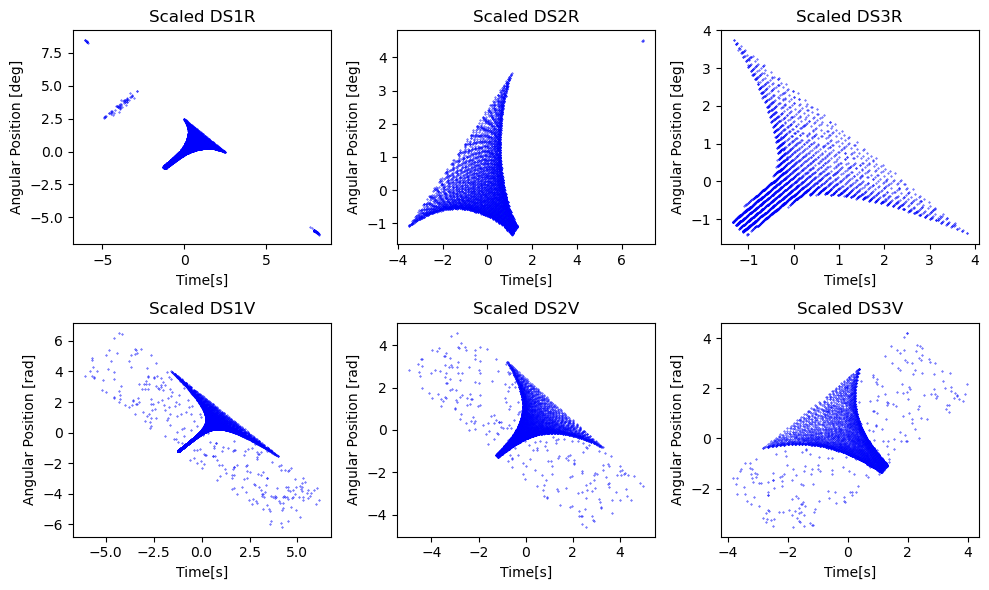

In [7]:
## Using principle component library of the sklearn
pca1r = PCA()
pca2r = PCA()
pca3r = PCA()
pca1v = PCA()
pca2v = PCA()
pca3v = PCA()

## Fitting datasets
pca1r.fit(X1r_std)
pca2r.fit(X2r_std)
pca3r.fit(X3r_std)
pca1v.fit(X1v_std)
pca2v.fit(X2v_std)
pca3v.fit(X3v_std)

# Compute the PCs and the scores
A1r = pca1r.components_.T
Z1r = X1r_std @ A1r
lamda1r = pca1r.singular_values_**2 #the eigenvectors are the singular values squared

A2r = pca2r.components_.T
Z2r = X2r_std @ A2r
lamda2r = pca2r.singular_values_**2 #the eigenvectors are the singular values squared

A3r = pca3r.components_.T
Z3r = X3r_std @ A3r
lamda3r = pca3r.singular_values_**2 #the eigenvectors are the singular values squared

A1v = pca1v.components_.T
Z1v = X1v_std @ A1v
lamda1v = pca1v.singular_values_**2 #the eigenvectors are the singular values squared

A2v = pca2v.components_.T
Z2v = X2v_std @ A2v
lamda2v = pca2v.singular_values_**2 #the eigenvectors are the singular values squared

A3v = pca3v.components_.T
Z3v = X3v_std @ A3v
lamda3v = pca3v.singular_values_**2 #the eigenvectors are the singular values squared

# Plot the scores
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
axes[0, 0].scatter(Z1r[:,0],Z1r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 0].set_title('Scaled DS1R')
axes[0, 0].set_xlabel('Time[s]')
axes[0, 0].set_ylabel('Angular Position [deg]')
axes[0, 1].scatter(Z2r[:,0],Z2r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 1].set_title('Scaled DS2R')
axes[0, 1].set_xlabel('Time[s]')
axes[0, 1].set_ylabel('Angular Position [deg]')
axes[0, 2].scatter(Z3r[:,0],Z3r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 2].set_title('Scaled DS3R')
axes[0, 2].set_xlabel('Time[s]')
axes[0, 2].set_ylabel('Angular Position [deg]')

# Second Row
axes[1, 0].scatter(Z1v[:,0],Z1v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 0].set_title('Scaled DS1V')
axes[1, 0].set_xlabel('Time[s]')
axes[1, 0].set_ylabel('Angular Position [rad]')
axes[1, 1].scatter(Z2v[:,0],Z2v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 1].set_title('Scaled DS2V')
axes[1, 1].set_xlabel('Time[s]')
axes[1, 1].set_ylabel('Angular Position [rad]')
axes[1, 2].scatter(Z3v[:,0],Z3v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 2].set_title('Scaled DS3V')
axes[1, 2].set_xlabel('Time[s]')
axes[1, 2].set_ylabel('Angular Position [rad]')


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Scaled.svg', dpi=300)
# Show the plot
plt.show()

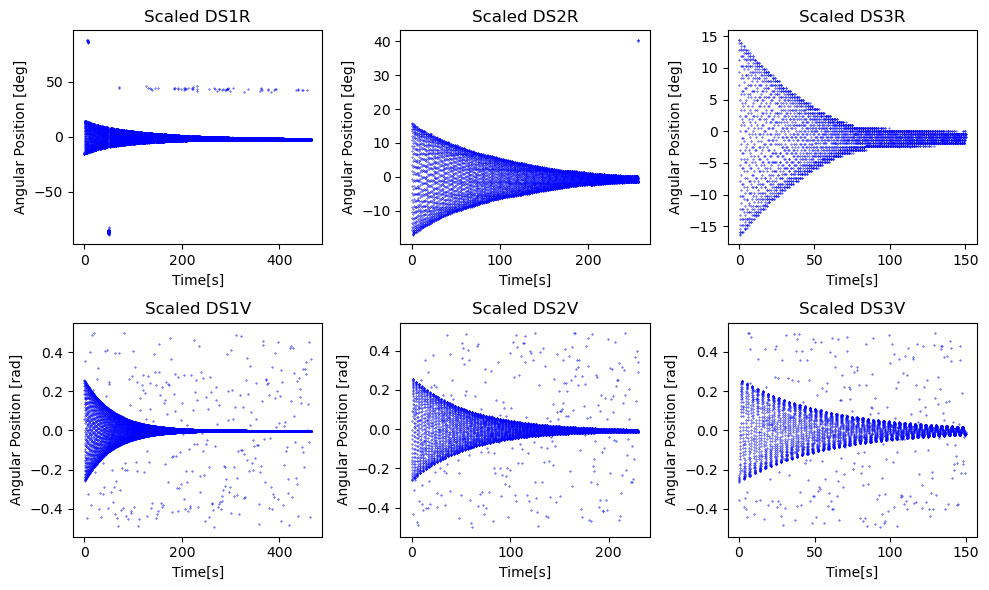

In [8]:
## Using principle component library of the sklearn without scaling
pca1r = PCA()
pca2r = PCA()
pca3r = PCA()
pca1v = PCA()
pca2v = PCA()
pca3v = PCA()

## Fitting datasets
pca1r.fit(X1_real)
pca2r.fit(X2_real)
pca3r.fit(X3_real)
pca1v.fit(X1_virt)
pca2v.fit(X2_virt)
pca3v.fit(X3_virt)

# Compute the PCs and the scores
A1r = pca1r.components_.T
Z1r = X1_real @ A1r
lamda1r = pca1r.singular_values_**2 #the eigenvectors are the singular values squared

A2r = pca2r.components_.T
Z2r = X2_real @ A2r
lamda2r = pca2r.singular_values_**2 #the eigenvectors are the singular values squared

A3r = pca3r.components_.T
Z3r = X3_real @ A3r
lamda3r = pca3r.singular_values_**2 #the eigenvectors are the singular values squared

A1v = pca1v.components_.T
Z1v = X1_virt @ A1v
lamda1v = pca1v.singular_values_**2 #the eigenvectors are the singular values squared

A2v = pca2v.components_.T
Z2v = X2_virt @ A2v
lamda2v = pca2v.singular_values_**2 #the eigenvectors are the singular values squared

A3v = pca3v.components_.T
Z3v = X3_virt @ A3v
lamda3v = pca3v.singular_values_**2 #the eigenvectors are the singular values squared

# Plot the scores
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
axes[0, 0].scatter(-Z1r[:,0],Z1r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 0].set_title('Scaled DS1R')
axes[0, 0].set_xlabel('Time[s]')
axes[0, 0].set_ylabel('Angular Position [deg]')
axes[0, 1].scatter(Z2r[:,0],Z2r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 1].set_title('Scaled DS2R')
axes[0, 1].set_xlabel('Time[s]')
axes[0, 1].set_ylabel('Angular Position [deg]')
axes[0, 2].scatter(-Z3r[:,0],Z3r[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[0, 2].set_title('Scaled DS3R')
axes[0, 2].set_xlabel('Time[s]')
axes[0, 2].set_ylabel('Angular Position [deg]')

# Second Row
axes[1, 0].scatter(Z1v[:,0],Z1v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 0].set_title('Scaled DS1V')
axes[1, 0].set_xlabel('Time[s]')
axes[1, 0].set_ylabel('Angular Position [rad]')
axes[1, 1].scatter(Z2v[:,0],Z2v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 1].set_title('Scaled DS2V')
axes[1, 1].set_xlabel('Time[s]')
axes[1, 1].set_ylabel('Angular Position [rad]')
axes[1, 2].scatter(-Z3v[:,0],Z3v[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes[1, 2].set_title('Scaled DS3V')
axes[1, 2].set_xlabel('Time[s]')
axes[1, 2].set_ylabel('Angular Position [rad]')


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Scaled.svg', dpi=300)
# Show the plot
plt.show()

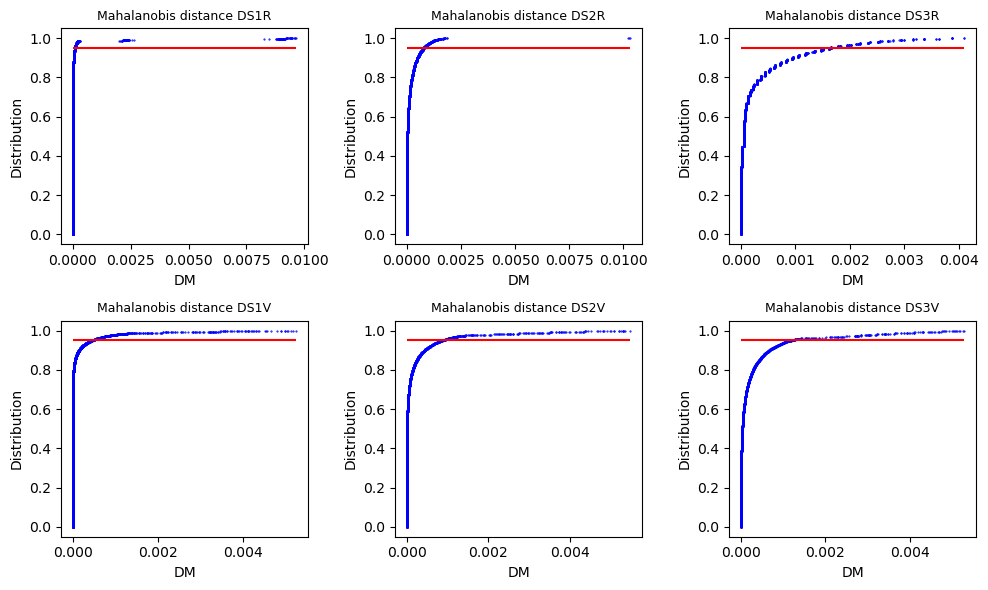

In [9]:
def ecdf(pc):
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# We calculate the Mahalanobis distance using Angular Position
dm1r_pc2 = Z1r[:,1]**2/lamda1r[1]
i_sort1r, pc2_1r_sort, dist1r_sort = ecdf(dm1r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm2r_pc2 = Z2r[:,1]**2/lamda2r[1]
i_sort2r, pc2_2r_sort, dist2r_sort = ecdf(dm2r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm3r_pc2 = Z3r[:,1]**2/lamda3r[1]
i_sort3r, pc2_3r_sort, dist3r_sort = ecdf(dm3r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm1v_pc2 = Z1v[:,1]**2/lamda1v[1]
i_sort1v, pc2_1v_sort, dist1v_sort = ecdf(dm1v_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm2v_pc2 = Z2v[:,1]**2/lamda2v[1]
i_sort2v, pc2_2v_sort, dist2v_sort = ecdf(dm2v_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm3v_pc2 = Z3v[:,1]**2/lamda3v[1]
i_sort3v, pc2_3v_sort, dist3v_sort = ecdf(dm3v_pc2)

# Threshold
threshold = 0.95


# Plot the cumulative distribution
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
axes[0, 0].scatter(pc2_1r_sort, dist1r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 0].hlines(threshold, pc2_1r_sort.min(), pc2_1r_sort.max(), color='r')
axes[0, 0].set_title('Mahalanobis distance DS1R',size=9)
axes[0, 0].set_xlabel('DM')
axes[0, 0].set_ylabel('Distribution')
axes[0, 1].scatter(pc2_2r_sort, dist2r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 1].hlines(threshold, pc2_2r_sort.min(), pc2_2r_sort.max(), color='r')
axes[0, 1].set_title('Mahalanobis distance DS2R',size=9)
axes[0, 1].set_xlabel('DM')
axes[0, 1].set_ylabel('Distribution')
axes[0, 2].scatter(pc2_3r_sort, dist3r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 2].hlines(threshold, pc2_3r_sort.min(), pc2_3r_sort.max(), color='r')
axes[0, 2].set_title('Mahalanobis distance DS3R',size=9)
axes[0, 2].set_xlabel('DM')
axes[0, 2].set_ylabel('Distribution')

# Second Row
axes[1, 0].scatter(pc2_1v_sort, dist1v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 0].hlines(threshold, pc2_1v_sort.min(), pc2_1v_sort.max(), color='r')
axes[1, 0].set_title('Mahalanobis distance DS1V',size=9)
axes[1, 0].set_xlabel('DM')
axes[1, 0].set_ylabel('Distribution')
axes[1, 1].scatter(pc2_2v_sort, dist2v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 1].hlines(threshold, pc2_2v_sort.min(), pc2_2v_sort.max(), color='r')
axes[1, 1].set_title('Mahalanobis distance DS2V',size=9)
axes[1, 1].set_xlabel('DM')
axes[1, 1].set_ylabel('Distribution')
axes[1, 2].scatter(pc2_3v_sort, dist3v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 2].hlines(threshold, pc2_3v_sort.min(), pc2_3v_sort.max(), color='r')
axes[1, 2].set_title('Mahalanobis distance DS3V',size=9)
axes[1, 2].set_xlabel('DM')
axes[1, 2].set_ylabel('Distribution')


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Threshold.png', dpi=300)
# Show the plot
plt.show()

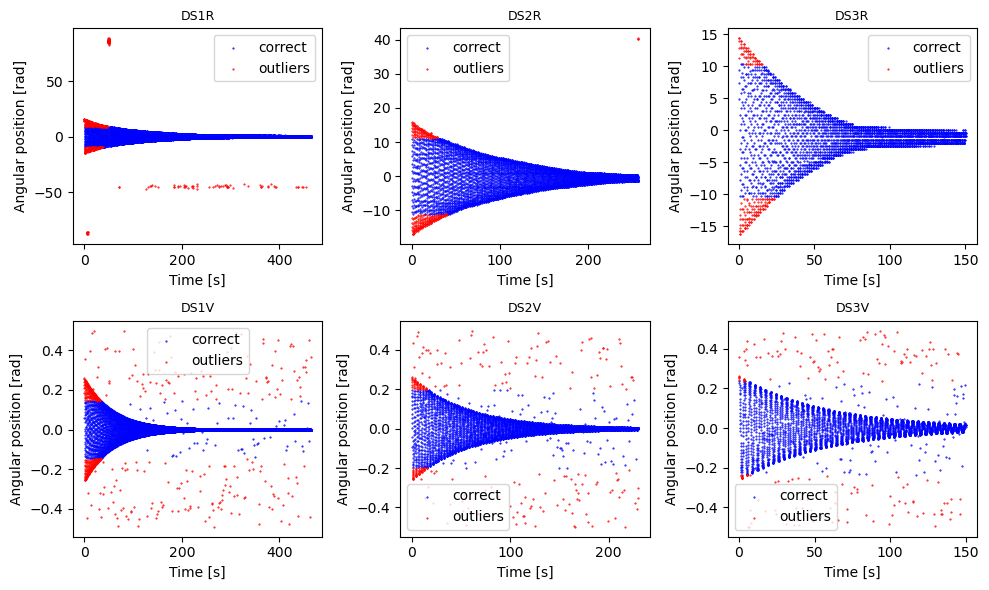

In [10]:
# this mask operation creates a boolean array that follows the conditions we impose
mask1r = dist1r_sort > threshold 
mask2r = dist2r_sort > threshold 
mask3r = dist3r_sort > threshold 

mask1v = dist1v_sort > threshold 
mask2v = dist2v_sort > threshold 
mask3v = dist3v_sort > threshold 

# Plot the cumulative distribution
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
# First
axes[0, 0].scatter(X1_real[i_sort1r[~mask1r], 0], X1_real[i_sort1r[~mask1r], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[0, 0].scatter(X1_real[i_sort1r[mask1r], 0], X1_real[i_sort1r[mask1r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 0].set_title('DS1R',size=9)
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Angular position [rad]')
axes[0, 0].legend()
# Second
axes[0, 1].scatter(X2_real[i_sort2r[~mask2r], 0], X2_real[i_sort2r[~mask2r], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[0, 1].scatter(X2_real[i_sort2r[mask2r], 0], X2_real[i_sort2r[mask2r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 1].set_title('DS2R',size=9)
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Angular position [rad]')
axes[0, 1].legend()
# Third
axes[0, 2].scatter(X3_real[i_sort3r[~mask3r], 0], X3_real[i_sort3r[~mask3r], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[0, 2].scatter(X3_real[i_sort3r[mask3r], 0], X3_real[i_sort3r[mask3r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 2].set_title('DS3R',size=9)
axes[0, 2].set_xlabel('Time [s]')
axes[0, 2].set_ylabel('Angular position [rad]')
axes[0, 2].legend()

# Second Row
# First
axes[1, 0].scatter(X1_virt[i_sort1v[~mask1v], 0], X1_virt[i_sort1v[~mask1v], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[1, 0].scatter(X1_virt[i_sort1v[mask1v], 0], X1_virt[i_sort1v[mask1v], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[1, 0].set_title('DS1V',size=9)
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Angular position [rad]')
axes[1, 0].legend()
# Second
axes[1, 1].scatter(X2_virt[i_sort2v[~mask2v], 0], X2_virt[i_sort2v[~mask2v], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[1, 1].scatter(X2_virt[i_sort2v[mask2v], 0], X2_virt[i_sort2v[mask2v], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[1, 1].set_title('DS2V',size=9)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Angular position [rad]')
axes[1, 1].legend()
# Third
axes[1, 2].scatter(X3_virt[i_sort3v[~mask3v], 0], X3_virt[i_sort3v[~mask3v], 1], 
                   label='correct', s=1, marker='.', edgecolors='blue')
axes[1, 2].scatter(X3_virt[i_sort3v[mask3v], 0], X3_virt[i_sort3v[mask3v], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[1, 2].set_title('DS3V',size=9)
axes[1, 2].set_xlabel('Time [s]')
axes[1, 2].set_ylabel('Angular position [rad]')
axes[1, 2].legend()


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Outliers5.png', dpi=300)
# Show the plot
plt.show()

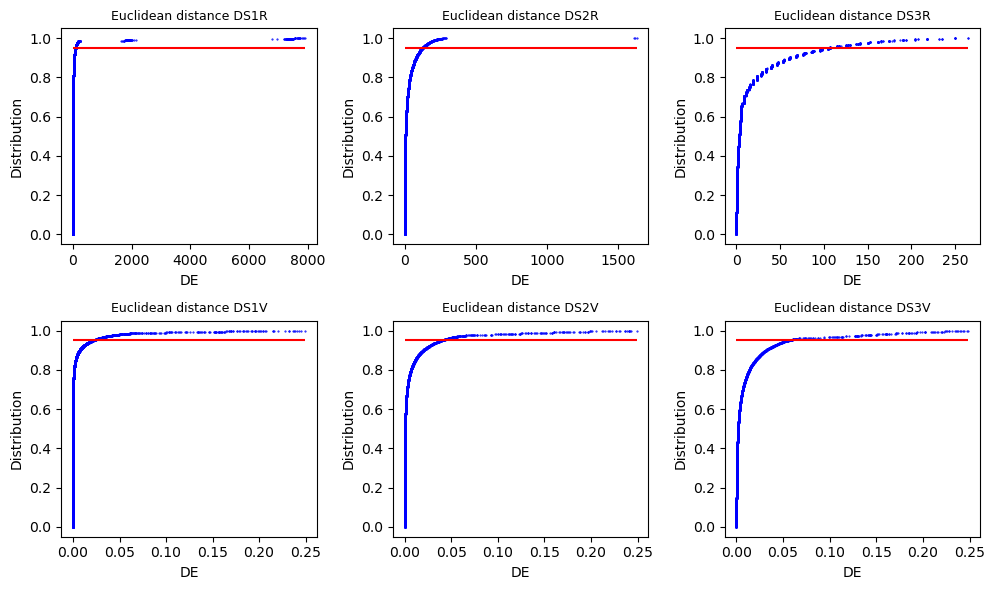

In [11]:
def ecdf(pc):
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# We calculate the Mahalanobis distance using Angular Position
dm1r_pc2 = Z1r[:,1]**2
i_sort1r, pc2_1r_sort, dist1r_sort = ecdf(dm1r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm2r_pc2 = Z2r[:,1]**2
i_sort2r, pc2_2r_sort, dist2r_sort = ecdf(dm2r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm3r_pc2 = Z3r[:,1]**2
i_sort3r, pc2_3r_sort, dist3r_sort = ecdf(dm3r_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm1v_pc2 = Z1v[:,1]**2
i_sort1v, pc2_1v_sort, dist1v_sort = ecdf(dm1v_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm2v_pc2 = Z2v[:,1]**2
i_sort2v, pc2_2v_sort, dist2v_sort = ecdf(dm2v_pc2)

# We calculate the Mahalanobis distance using Angular Position
dm3v_pc2 = Z3v[:,1]**2
i_sort3v, pc2_3v_sort, dist3v_sort = ecdf(dm3v_pc2)

# Threshold
threshold = 0.95


# Plot the cumulative distribution
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
axes[0, 0].scatter(pc2_1r_sort, dist1r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 0].hlines(threshold, pc2_1r_sort.min(), pc2_1r_sort.max(), color='r')
axes[0, 0].set_title('Euclidean distance DS1R',size=9)
axes[0, 0].set_xlabel('DE')
axes[0, 0].set_ylabel('Distribution')
axes[0, 1].scatter(pc2_2r_sort, dist2r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 1].hlines(threshold, pc2_2r_sort.min(), pc2_2r_sort.max(), color='r')
axes[0, 1].set_title('Euclidean distance DS2R',size=9)
axes[0, 1].set_xlabel('DE')
axes[0, 1].set_ylabel('Distribution')
axes[0, 2].scatter(pc2_3r_sort, dist3r_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[0, 2].hlines(threshold, pc2_3r_sort.min(), pc2_3r_sort.max(), color='r')
axes[0, 2].set_title('Euclidean distance DS3R',size=9)
axes[0, 2].set_xlabel('DE')
axes[0, 2].set_ylabel('Distribution')

# Second Row
axes[1, 0].scatter(pc2_1v_sort, dist1v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 0].hlines(threshold, pc2_1v_sort.min(), pc2_1v_sort.max(), color='r')
axes[1, 0].set_title('Euclidean distance DS1V',size=9)
axes[1, 0].set_xlabel('DE')
axes[1, 0].set_ylabel('Distribution')
axes[1, 1].scatter(pc2_2v_sort, dist2v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 1].hlines(threshold, pc2_2v_sort.min(), pc2_2v_sort.max(), color='r')
axes[1, 1].set_title('Euclidean distance DS2V',size=9)
axes[1, 1].set_xlabel('DE')
axes[1, 1].set_ylabel('Distribution')
axes[1, 2].scatter(pc2_3v_sort, dist3v_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes[1, 2].hlines(threshold, pc2_3v_sort.min(), pc2_3v_sort.max(), color='r')
axes[1, 2].set_title('Euclidean distance DS3V',size=9)
axes[1, 2].set_xlabel('DE')
axes[1, 2].set_ylabel('Distribution')


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
# plt.savefig('Threshold.png', dpi=300)
# Show the plot
plt.show()

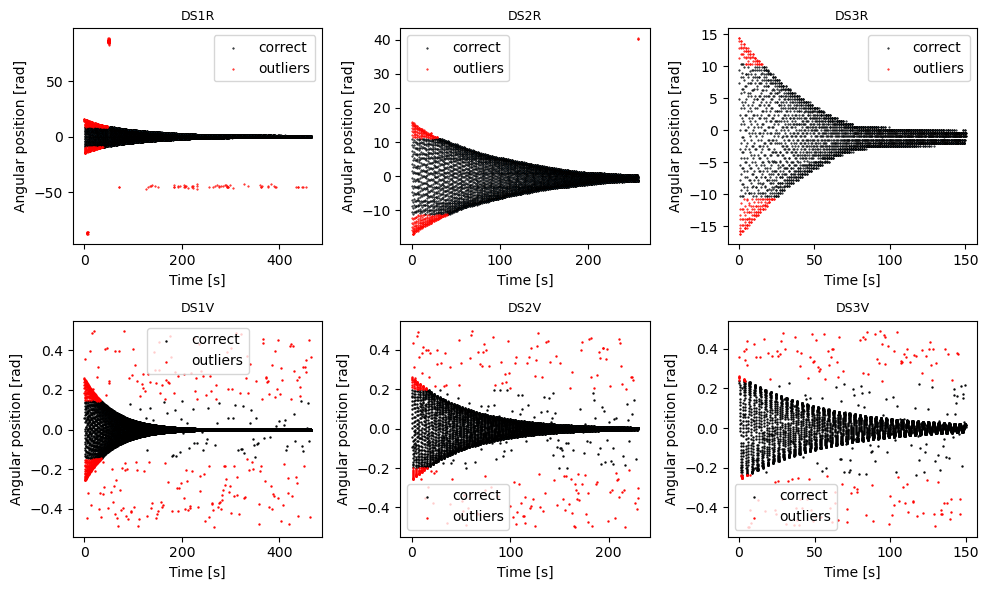

In [21]:
# this mask operation creates a boolean array that follows the conditions we impose
mask1r = dist1r_sort > threshold 
mask2r = dist2r_sort > threshold 
mask3r = dist3r_sort > threshold 

mask1v = dist1v_sort > threshold 
mask2v = dist2v_sort > threshold 
mask3v = dist3v_sort > threshold 

# Plot the cumulative distribution
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# First Row
# First
axes[0, 0].scatter(X1_real[i_sort1r[~mask1r], 0], X1_real[i_sort1r[~mask1r], 1], 
                   label='correct', s=1, marker='.', edgecolors='black')
axes[0, 0].scatter(X1_real[i_sort1r[mask1r], 0], X1_real[i_sort1r[mask1r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 0].set_title('DS1R',size=9)
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Angular position [rad]')
axes[0, 0].legend()
# Second
axes[0, 1].scatter(X2_real[i_sort2r[~mask2r], 0], X2_real[i_sort2r[~mask2r], 1], 
                   label='correct', s=1, marker='.', edgecolors='black')
axes[0, 1].scatter(X2_real[i_sort2r[mask2r], 0], X2_real[i_sort2r[mask2r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 1].set_title('DS2R',size=9)
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Angular position [rad]')
axes[0, 1].legend()
# Third
axes[0, 2].scatter(X3_real[i_sort3r[~mask3r], 0], X3_real[i_sort3r[~mask3r], 1], 
                   label='correct', s=1, marker='.', edgecolors='black')
axes[0, 2].scatter(X3_real[i_sort3r[mask3r], 0], X3_real[i_sort3r[mask3r], 1], 
                   label='outliers', s=1, marker='.', edgecolors='red')
axes[0, 2].set_title('DS3R',size=9)
axes[0, 2].set_xlabel('Time [s]')
axes[0, 2].set_ylabel('Angular position [rad]')
axes[0, 2].legend()

# Second Row
# First
axes[1, 0].scatter(X1_virt[i_sort1v[~mask1v], 0], X1_virt[i_sort1v[~mask1v], 1], 
                   label='correct', s=2, marker='.', edgecolors='black')
axes[1, 0].scatter(X1_virt[i_sort1v[mask1v], 0], X1_virt[i_sort1v[mask1v], 1], 
                   label='outliers', s=2, marker='.', edgecolors='red')
axes[1, 0].set_title('DS1V',size=9)
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Angular position [rad]')
axes[1, 0].legend()
# Second
axes[1, 1].scatter(X2_virt[i_sort2v[~mask2v], 0], X2_virt[i_sort2v[~mask2v], 1], 
                   label='correct', s=2, marker='.', edgecolors='black')
axes[1, 1].scatter(X2_virt[i_sort2v[mask2v], 0], X2_virt[i_sort2v[mask2v], 1], 
                   label='outliers', s=2, marker='.', edgecolors='red')
axes[1, 1].set_title('DS2V',size=9)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Angular position [rad]')
axes[1, 1].legend()
# Third
axes[1, 2].scatter(X3_virt[i_sort3v[~mask3v], 0], X3_virt[i_sort3v[~mask3v], 1], 
                   label='correct', s=2, marker='.', edgecolors='black')
axes[1, 2].scatter(X3_virt[i_sort3v[mask3v], 0], X3_virt[i_sort3v[mask3v], 1], 
                   label='outliers', s=2, marker='.', edgecolors='red')
axes[1, 2].set_title('DS3V',size=9)
axes[1, 2].set_xlabel('Time [s]')
axes[1, 2].set_ylabel('Angular position [rad]')
axes[1, 2].legend()


# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Outliers2.png', dpi=300)
# Show the plot
plt.show()


In [13]:
X1_real = np.concatenate((t1_real,theta1_real), axis=1)
X = X1_real[:2000,:]
X.shape

(2000, 2)

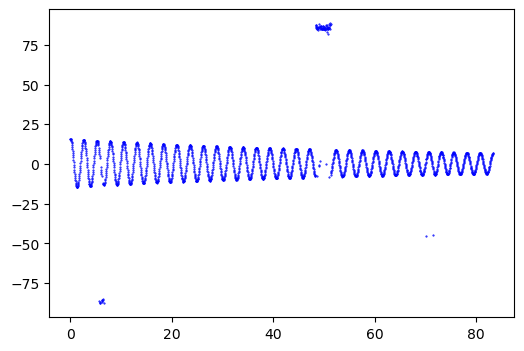

In [14]:
fig, axes = plt.subplots(figsize=(6, 4))

# First Row
axes.scatter(X[:,0], X[:,1], s=1, marker='.', edgecolors='blue', alpha=1)
plt.show()

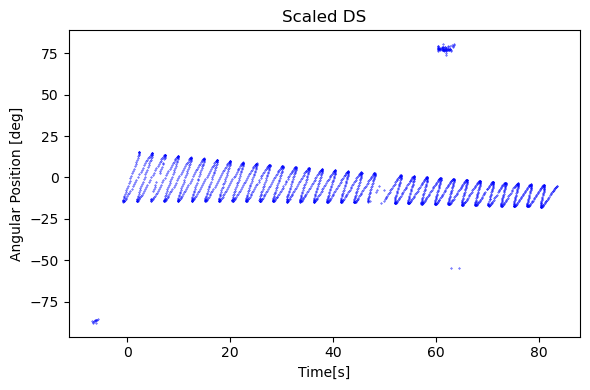

In [15]:
## Using principle component library of the sklearn without scaling
pca = PCA()

## Fitting datasets
pca.fit(X)

# Compute the PCs and the scores
A = pca.components_.T
Z = X @ A
lamda = pca.singular_values_**2 #the eigenvectors are the singular values squared

# Plot the scores
fig, axes = plt.subplots(figsize=(6, 4))

# First Row
axes.scatter(-Z[:,0],-Z[:,1], s=0.5, marker='.', edgecolors='blue', alpha=1)
axes.set_title('Scaled DS')
axes.set_xlabel('Time[s]')
axes.set_ylabel('Angular Position [deg]')



# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Scaled.svg', dpi=300)
# Show the plot
plt.show()

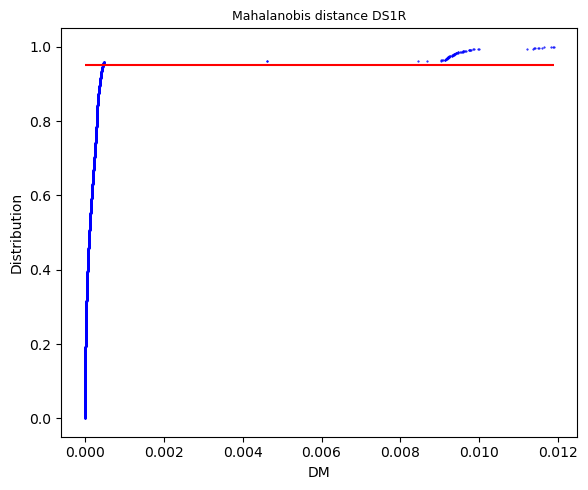

In [25]:
def ecdf(pc):
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# We calculate the Mahalanobis distance using Angular Position
dm_pc2 = Z[:,1]**2/lamda[1]
i_sort, pc2_sort, dist_sort = ecdf(dm_pc2)


# Threshold
threshold = 0.95


# Plot the cumulative distribution
fig, axes = plt.subplots(figsize=(6, 5))

# First Row
axes.scatter(pc2_sort, dist_sort, s=1, marker='.', edgecolors='blue', alpha=1)
axes.hlines(threshold, pc2_sort.min(), pc2_sort.max(), color='r')
axes.set_title('Mahalanobis distance DS1R',size=9)
axes.set_xlabel('DM')
axes.set_ylabel('Distribution')

# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Threshold4.png', dpi=300)
# Show the plot
plt.show()

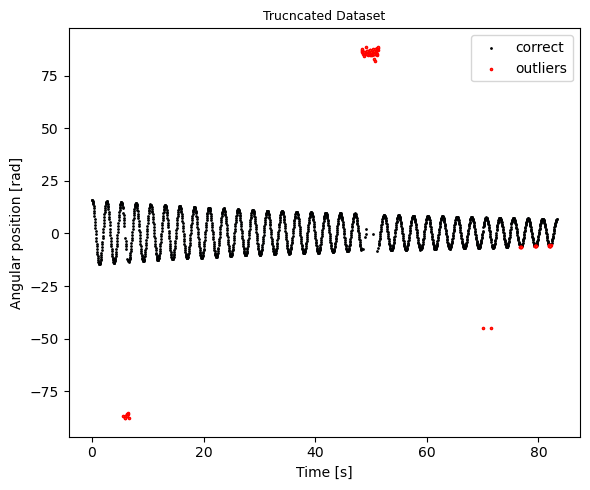

In [26]:
# this mask operation creates a boolean array that follows the conditions we impose
mask = dist_sort > threshold 


# Plot the cumulative distribution
fig, axes = plt.subplots(figsize=(6, 5))

# First Row
# First
axes.scatter(X[i_sort[~mask], 0], X[i_sort[~mask], 1], 
                   label='correct', s=4, marker='.', edgecolors='black')
axes.scatter(X[i_sort[mask], 0], X[i_sort[mask], 1], 
                   label='outliers', s=10, marker='.', edgecolors='red')
axes.set_title('Trucncated Dataset',size=9)
axes.set_xlabel('Time [s]')
axes.set_ylabel('Angular position [rad]')
axes.legend()



# Adjust the spacing between subplots
plt.tight_layout()
# Saving the figure in a vector format
plt.savefig('Outliers3.png', dpi=300)
# Show the plot
plt.show()